In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/chocolate-sales/ChocolateSales.pbix
/kaggle/input/chocolate-sales/Chocolate Sales (2).csv
/kaggle/input/chocolate-sales/ChocolateSales.pdf
/kaggle/input/chocolate-sales/ChocolateSales.pbit


In [2]:
df = pd.read_csv('/kaggle/input/chocolate-sales/Chocolate Sales (2).csv',encoding='ascii',delimiter=',')
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


### Transformacion de datos:

In [3]:
# La columna DATE cambiarle el formato a DateTime:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [4]:
# Verifica si hay valores nulos:
df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [5]:
# ELiminar el icono de $ en la Columna Amount:
df["Amount"] = (
    df["Amount"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

In [6]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184


### En busqueda de outliers en los datos:

1) La primera forma es enciontrar outliers en los datos actaules (Datos fueran del rango)
2) La segunda forma es crear df_outliers entregando nostros los parametros de los cuartiles y definiendo los Q1 y Q3 

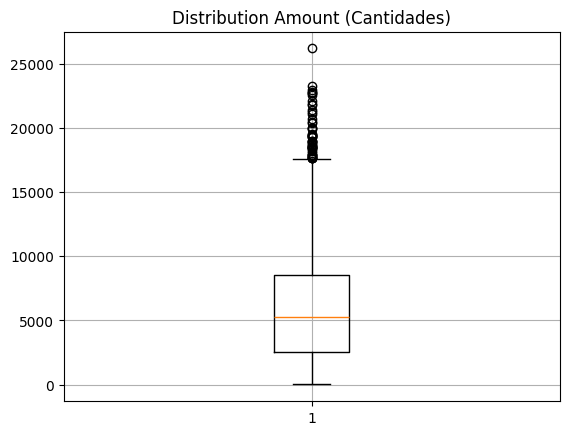

In [7]:
# Primera forma:
plt.figure()
plt.boxplot(df["Amount"])
plt.title("Distribution Amount (Cantidades)")
plt.grid(True)
plt.show()

In [8]:
# Segunda forma (Creacion del histograma) 
# Técnicas Estadísticas: Rango Intercuartílico (IQR): Calcula los cuartiles Q1 y Q3, y define outliers como valores fuera de
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [9]:
# Filtrar Otuliers:
outliers = df[(df['Amount'] < limite_inferior) | (df['Amount'] > limite_superior)]

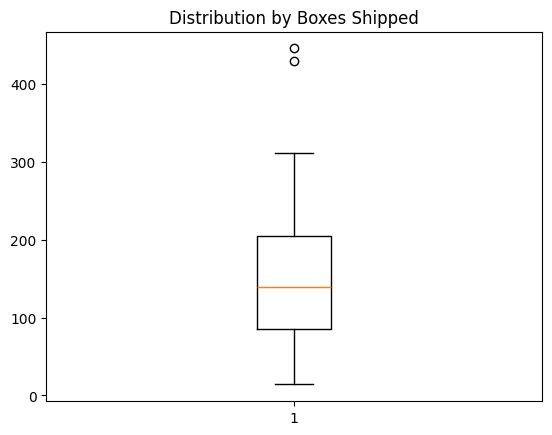

In [10]:
#Detecciones de Outliers Boxes Shipped (Cajas enviada):
plt.figure()
plt.boxplot(outliers["Boxes Shipped"])
plt.title("Distribution by Boxes Shipped")
plt.show()

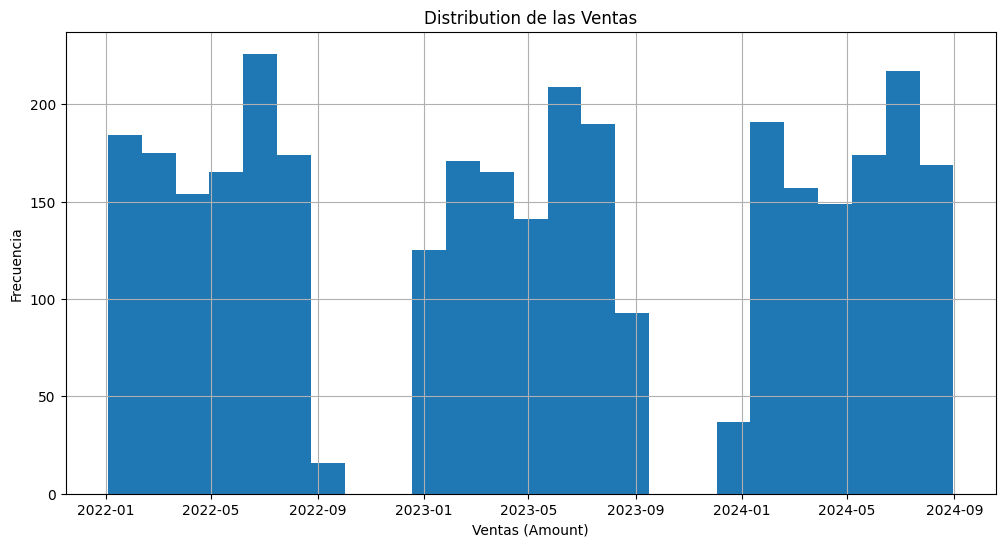

In [11]:
# Grafico que nos muestra la distribucion por semestres en los años 2022, 2023 y 2024:
plt.figure(figsize = (12, 6))
plt.hist(df['Date'],bins = 25)
plt.title("Distribution de las Ventas")
plt.xlabel("Ventas (Amount)")
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### Analisis Temporal:


In [12]:
# Crear columnas con Year, Month y Week:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

In [13]:
# Ventas por pais:
df.groupby("Country")["Amount"].sum().sort_values(ascending=False)

Country
Australia      3646444.35
UK             3365388.90
India          3343730.83
USA            3313858.09
Canada         3078495.65
New Zealand    3043654.04
Name: Amount, dtype: float64

In [14]:
# Ventas por año:
df.groupby("Year")["Amount"].sum()

Year
2022    6183625.00
2023    6643377.96
2024    6964568.90
Name: Amount, dtype: float64

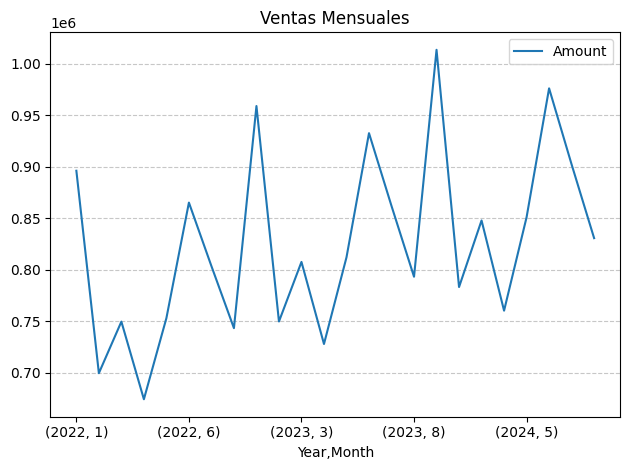

In [15]:
# Ventas por mes:
ventas_mensuales = df.groupby(["Year", "Month"])["Amount"].sum()
ventas_mensuales.plot()
plt.title("Ventas Mensuales")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout() 
plt.show()